In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

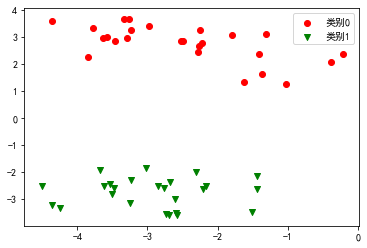

In [2]:
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_classes=2, 
                           class_sep=2.8, n_clusters_per_class=1, flip_y=0, random_state=23)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", marker="o", label="类别0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="g", marker="v", label="类别1")
plt.legend()

In [3]:
svc = SVC(kernel="linear")
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
# 系数
w = svc.coef_.ravel()

# 偏置
b = svc.intercept_.ravel()[0]

In [5]:
x0, x1 = -5, 0
y00 = (-1 - b - x0 * w[0]) / w[1]
y01 = (-1 - b - x1 * w[0]) / w[1]

y0 = ( - b - x0 * w[0]) / w[1]
y1 = ( - b - x1 * w[0]) / w[1]

y10 = (1 - b - x0 * w[0]) / w[1]
y11 = (1 - b - x1 * w[0]) / w[1]

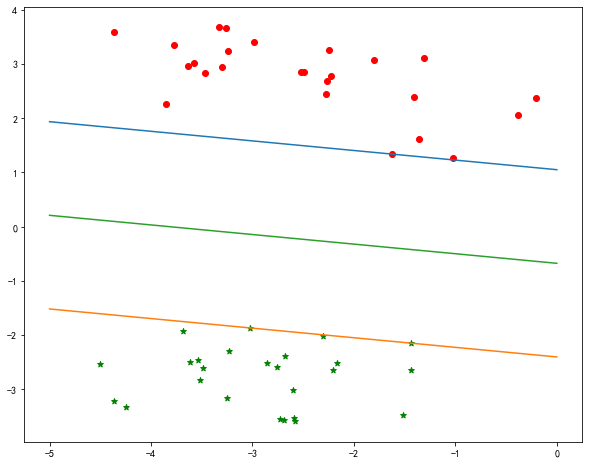

In [6]:
plt.figure(figsize=(10, 8))
colors = ['r', 'g']
marker = ["o", "*"]
class_label = [0, 1]
for i, class_ in enumerate(class_label):
    plt.scatter(x=X[y == class_, 0], y=X[y == class_, 1], c=colors[i], label=class_, marker=marker[i])
    
plt.plot([x0, x1], [y00, y01])
plt.plot([x0, x1], [y10, y11])
plt.plot([x0, x1], [y0, y1])

plt.show()